In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [13]:
df = pd.read_csv("sports_management_encoded.csv")
df

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,...,National Event,Regional Event,Community Development Event,Health-Oriented Event,Recreational Event,Youth-Focused Event,Community Development Event.1,Health-Oriented Event.1,Recreational Event.1,Youth-Focused Event.1
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101995,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
101996,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
101997,1.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
101998,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [14]:
# Model for Resource Efficiency Feature as indicated by the dataset creator
resource_eff_columns = ['Operational Cost Efficiency', 'Water Usage', 'Material Recycling Rate', 'Resource Efficiency']
df_resource_efficiency = df[resource_eff_columns]
df_resource_efficiency.head(10)

,Operational Cost Efficiency,Water Usage,Material Recycling Rate,Resource Efficiency
0,2.0,1.0,1.0,1.0
1,1.0,1.0,0.0,1.0
2,1.0,1.0,1.0,2.0
3,1.0,1.0,1.0,2.0
4,2.0,2.0,2.0,1.0
5,1.0,1.0,0.0,1.0
6,2.0,1.0,1.0,1.0
7,2.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,2.0,0.0,0.0,1.0


In [17]:
X= df.drop(columns = ["Resource Efficiency"]) 
y= df["Resource Efficiency"] 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [18]:
clf =  DecisionTreeClassifier(random_state=1)

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [20]:
predictions = clf.predict(X_test)
predictions

array([1., 2., 0., ..., 2., 1., 0.])

In [21]:
accuracy_score(y_test, predictions)

0.36792156862745096

In [22]:
print(f"Training Score: {clf.score(X_train, y_train)}")
print(f"Testing Score: {clf.score(X_test, y_test)}")

Training Score: 0.9757777777777777
Testing Score: 0.36792156862745096


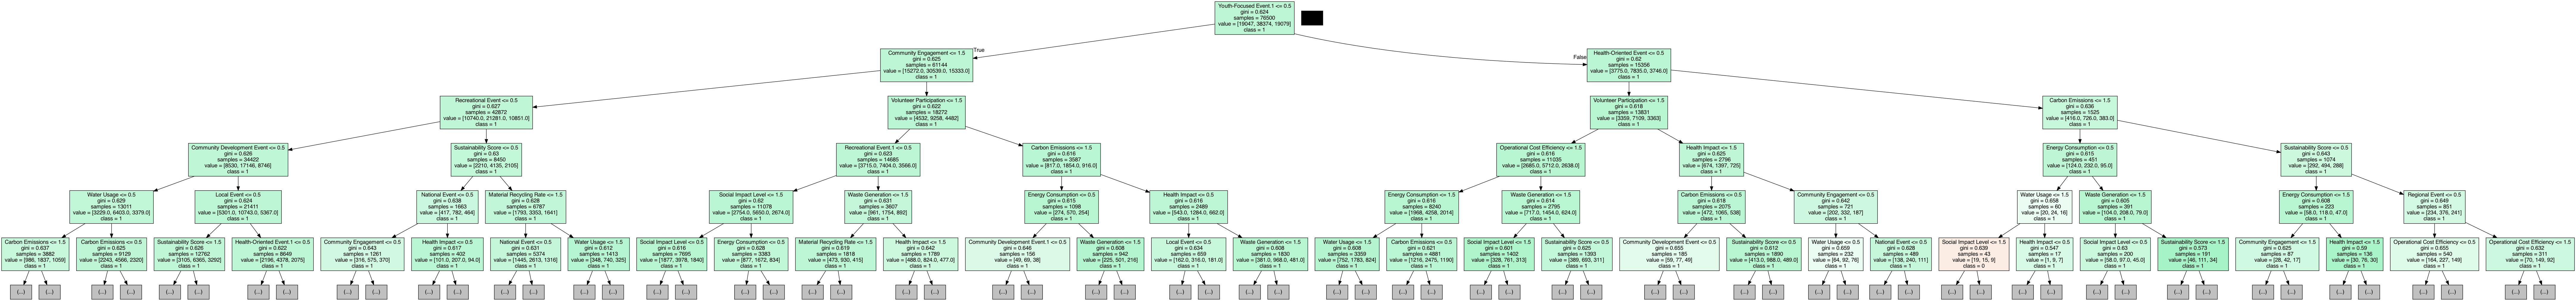

In [23]:
## Visualizing the Decision Tree
# Create DOT data
dot_data = tree.export_graphviz(
    clf, out_file=None, feature_names=X.columns, class_names=["0", "1", "2"], filled=True, max_depth=5
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [24]:
# create a function for the DecisionTreeClassifier
def train_decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    clf = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
    print(f'Training Score: {clf.score(X_train, y_train)}')
    print(f'Testing Score: {clf.score(X_test, y_test)}')
    return clf

In [11]:
# create a function for the DecisionTreeClassifier
#def DecisionTreeClassifier(X, y):
    #X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    #clf = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
    #print(f'Training Score: {clf.score(X_train, y_train)}')
    #print(f'Testing Score: {clf.score(X_test, y_test)}')
    #return clf

In [ ]:
# run the DecisionTreeClassifier model with a depth parameter looping from 1 to 15

#for i in range(1, 16):
    #print(f'Depth: {i}')
    #ExtraTreesClassifier_model_depth(X, y, i)